# Project 4&5 Data visualization

There are two types of data visualization:
- Exploratory data visualization: we build graphs for ourselves to explore data and find patterns.
- Explanatory data visualization: we build graphs for others to communicate and explain the patterns we've found through exploring data.

In Part-1 of the project we will use exploratory data visualization with I-94 traffic dataset to show the following:

- How to visualize time series data with line plots.
- How to visualize correlations with scatter plots.
- How to visualize frequency distributions with bar plots and histograms.
- How to speed up our exploratory data visualization workflow with the pandas library.
- How to compare graphs using grid charts.

We're going to analyze a dataset about the westbound traffic on the I-94 Interstate highway.John Hogue made the dataset available, and you can download it from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume). 

**The goal of Part-1** is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

In Part-2 we will combine different skills from explanatory data visualization and use them on dataset that describes Euro daily exchange rates between 1999 and 2021.We will show the following:

- How to use information design principles (familiarity and maximizing the data-ink ratio) to create better graphs for an audience.
- About the elements of a story and how to create storytelling data visualizations using Matplotlib.
- How to create visual patterns using Gestalt principles.
- How to guide the audience's attention with pre-attentive attributes.
- How to use Matplotlib built-in styles — with a case study on the FiveThirtyEight style.

Daria Chemkaeva put together the data set and made it available on [Kaggle](https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020) — the data source is the European Central Bank. Note that the dataset gets regular updates — we will be working with copy downloaded on January 2021.

**The goal of Part-2** is to tell compelling story using data visualization.

# Part 1.1 - Importing Data

Attribute Information:

- holiday Categorical US National holidays plus regional holiday, Minnesota State Fair 
- temp Numeric Average temp in kelvin 
- rain_1h Numeric Amount in mm of rain that occurred in the hour 
- snow_1h Numeric Amount in mm of snow that occurred in the hour 
- clouds_all Numeric Percentage of cloud cover 
- weather_main Categorical Short textual description of the current weather 
- weather_description Categorical Longer textual description of the current weather 
- date_time DateTime Hour of the data collected in local CST time 
- traffic_volume Numeric Hourly I-94 ATR 301 reported westbound traffic volume


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
i94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
i94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [3]:
i94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
i94.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [5]:
i94.describe(include='all')

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
count,48204,48204.000000,48204.000000,48204.000000,48204.000000,48204,48204,48204,48204.000000
unique,12,NaN,NaN,NaN,NaN,11,38,40575,NaN
top,None,NaN,NaN,NaN,NaN,Clouds,sky is clear,2013-05-19 10:00:00,NaN
freq,48143,NaN,NaN,NaN,NaN,15164,11665,6,NaN
mean,NaN,281.205870,0.334264,0.000222,49.362231,NaN,NaN,NaN,3259.818355
std,NaN,13.338232,44.789133,0.008168,39.015750,NaN,NaN,NaN,1986.860670
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
25%,NaN,272.160000,0.000000,0.000000,1.000000,NaN,NaN,NaN,1193.000000
50%,NaN,282.450000,0.000000,0.000000,64.000000,NaN,NaN,NaN,3380.000000
75%,NaN,291.806000,0.000000,0.000000,90.000000,NaN,NaN,NaN,4933.000000


In [6]:
i94.nunique()

holiday                   12
temp                    5843
rain_1h                  372
snow_1h                   12
clouds_all                60
weather_main              11
weather_description       38
date_time              40575
traffic_volume          6704
dtype: int64

The dataset has 48,204 rows and 9 columns, and there are no null values. Each row describes traffic and weather data for a specific hour — we have data from 2012-10-02 09:00:00 until 2018-09-30 23:00:00.

The [dataset documentation](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west).

![i94](i94_figma.png)

This means that the results of our analysis will be about the westbound traffic in the proximity of that station. In other words, we should avoid generalizing our results for the entire I-94 highway.

# Part 1.2 - Analyzing Traffic Volume

<AxesSubplot:ylabel='Frequency'>

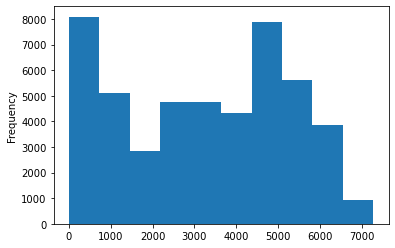

In [7]:
#plot histogram using pandas method

i94['traffic_volume'].plot.hist()

In [8]:
i94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between 2012-10-02 09:00:00 and 2018-09-30 23:00:00, the hourly traffic volume varied from 0 to 7,280 cars, with an average of 3,260 cars.

About 25% of the time, there were only 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction. However, about 25% of the time, the traffic volume was four times as much (4,933 cars or more).

This observation gives our analysis an interesting direction: **comparing daytime data with nighttime data.**

## 1.2.1 Daytime vs Nighttime data

We'll start by dividing the dataset into two parts:
- Daytime data: hours from 7 AM to 7 PM (12 hours)
- Nighttime data: hours from 7 PM to 7 AM (12 hours)

While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.

In [9]:
i94['date_time'] = pd.to_datetime(i94['date_time'])
i94_day = i94.copy()[(i94['date_time'].dt.hour >= 7) & (i94['date_time'].dt.hour < 19)]
i94_night = i94.copy()[(i94['date_time'].dt.hour >= 19) | (i94['date_time'].dt.hour < 7)]

print(i94_day.shape)
print(i94_night.shape)

(23877, 9)
(24327, 9)


This significant difference in row numbers between day and night is due to a few hours of missing data. For instance, if you look at rows 176 and 177 (i_94.iloc[176:178]), you'll notice there's no data for two hours (4 and 5).

Now that we've isolated day and night, we're going to look at the histograms of traffic volume side-by-side by using a grid chart.

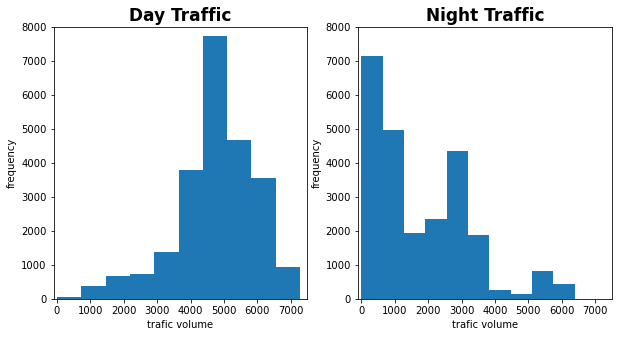

In [10]:
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.hist(i94_day['traffic_volume'])
plt.ylabel('frequency')
plt.xlabel('trafic volume')
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Day Traffic',
        size=17, weight='bold')

plt.subplot(1,2,2)
plt.hist(i94_night['traffic_volume'])
plt.ylabel('frequency')
plt.xlabel('trafic volume')
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Night Traffic',
        size=17, weight='bold')


plt.show()

In [11]:
i94_day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [12]:
i94_night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram that shows the distribution of traffic volume during the day is left skewed. This means that most of the traffic volume values are high — there are 4,252 or more cars passing the station each hour 75% of the time (because 25% of values are less than 4,252).

The histogram displaying the nighttime data is right skewed. This means that most of the traffic volume values are low — 75% of the time, the number of cars that passed the station each hour was less than 2,819.

Although there are still measurements of over 5,000 cars per hour, the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we'll only focus on the daytime data moving forward.

## 1.2.2 Time indicators during the day

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

- Month
- Day of the week
- Time of day

The fastest way to get the **average traffic volume for each month** is by using the `DataFrame.groupby()` method. If you haven't yet learned this method, don't worry: we'll write out the code for you, and you'll only have to focus on the visualization code.

<AxesSubplot:xlabel='month'>

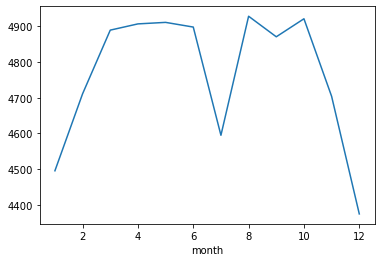

In [13]:
i94_day['month'] = i94_day['date_time'].dt.month
by_month = i94_day.groupby('month').mean()
by_month['traffic_volume'].plot.line()

The traffic looks less heavy during cold months (November–February) and more intense during warm months (March–October), with one interesting exception: July. Is there anything special about July? Is traffic significantly less heavy in July each year?

To answer the last question, let's see how the **traffic volume changed each year in July**.

<AxesSubplot:xlabel='year'>

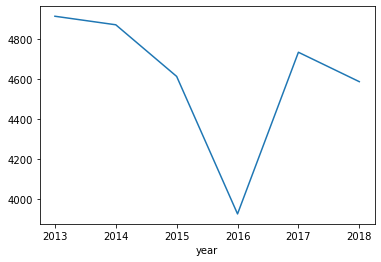

In [14]:
i94_day['year'] = i94_day['date_time'].dt.year
yearly_july = i94_day[i94_day['month'] == 7]
yearly_july.groupby('year').mean()['traffic_volume'].plot.line()

Typically, the traffic is pretty heavy in July, similar to the other warm months. The only exception we see is 2016, which had a high decrease in traffic volume. One possible reason for this is road construction — [this article from 2016](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696) supports this hypothesis.

As a tentative conclusion here, we can say that warm months generally show heavier traffic compared to cold months. In a warm month, you can can expect for each hour of daytime a traffic volume close to 5,000 cars.

We'll now continue with building line plots for another time unit: day of the week.

To get the traffic volume averages for **each day of the week**, we'll need to use the following code:

<AxesSubplot:xlabel='dayofweek'>

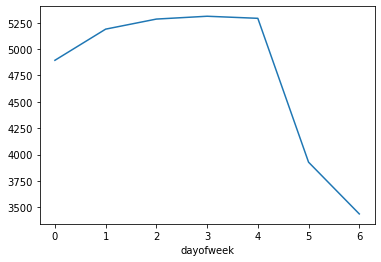

In [15]:
i94_day['dayofweek'] = i94_day['date_time'].dt.dayofweek
i94_day.groupby('dayofweek').mean()['traffic_volume'].plot.line()

Traffic volume is significantly heavier on business days (Monday – Friday). Except for Monday, we only see values over 5,000 during business days. Traffic is lighter on weekends, with values below 4,000 cars.

Let's now see what values we have **based on time of the day**. The weekends, however, will drag down the average values, so we're going to look only at the averages separately.

In [16]:
i94_day['hour'] = i94_day['date_time'].dt.hour
bussiness_days = i94_day.copy()[i94_day['dayofweek'] <= 4] # 4 == Friday
weekend = i94_day.copy()[i94_day['dayofweek'] >= 5] # 5 = Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

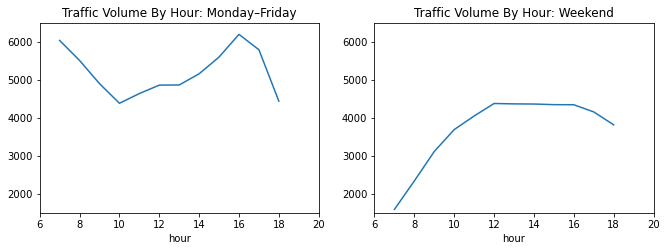

In [17]:
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Monday–Friday')

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Weekend')

plt.show()

At each hour of the day, the traffic volume is generally higher during business days compared to the weekends. As somehow expected, the rush hours are around 7 and 16 — when most people travel from home to work and back. We see volumes of over 6,000 cars at rush hours.

**To summarize**, we found a few time-related indicators of heavy traffic:
- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are around 7 and 16.

## 1.2.3 Weather indicators

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

A few of these columns are numerical so let's start by looking up their correlation values with traffic_volume.

In [18]:
i94_day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Temperature shows the strongest correlation with a value of just +0.13. The other relevant columns (rain_1h, snow_1h, clouds_all) don't show any strong correlation with traffic_value.

Let's generate a scatter plot to visualize the correlation between temp and traffic_volume.

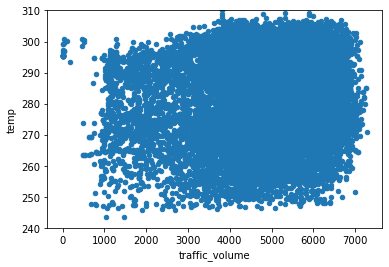

In [19]:
i94_day.plot.scatter('traffic_volume', 'temp')
plt.ylim(240, 310)
plt.show()

We can conclude that temperature doesn't look like a solid indicator of heavy traffic.

Let's now look at the other weather-related columns: weather_main and weather_description. To start, we're going to **group the data by weather_main and look at the traffic_volume averages**.

In [20]:
by_weather_main = i94_day.groupby('weather_main').mean()
by_weather_description = i94_day.groupby('weather_description').mean()

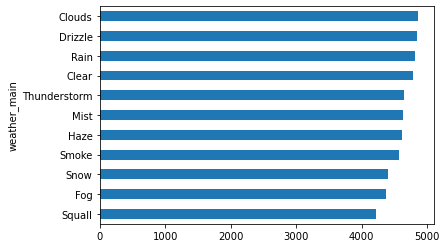

In [21]:
by_weather_main['traffic_volume'].sort_values().plot.barh()
plt.show()

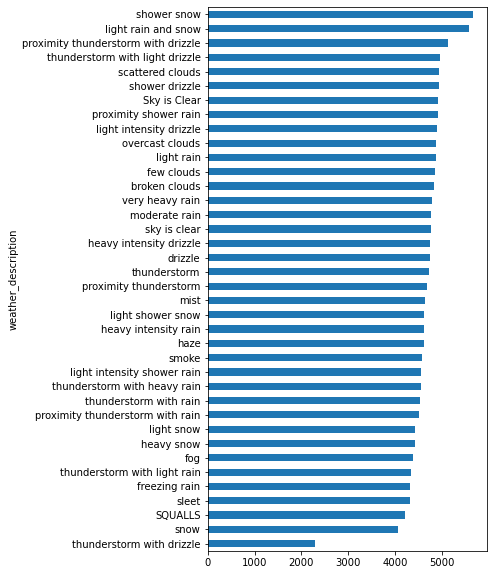

In [22]:
by_weather_description['traffic_volume'].sort_values().plot.barh(figsize=(5,10))
plt.show()

It looks like there are three weather types where traffic volume exceeds 5,000:
- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle

It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.

## 1.2.4 Conclusion

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:
1. Time indicators
    - The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
    - The traffic is usually heavier on business days compared to the weekends.
On business days, the rush hours are around 7 and 16.
2. Weather indicators
    - Shower snow
    - Light rain and snow
    - Proximity thunderstorm with drizzle
    
## Next steps include the following:

- Use the nighttime data to look for heavy traffic indicators.
- Find more time and weather indicators.
- Make your project portfolio-ready by following this style guide.

# Part 2.1 - Importing Data

Dataset contains date and Euro rate corresponding to Australian dollar, Bulgarian lev, Brazilian real, Canadian dollar, Swiss franc, Chinese yuan renminbi, Cypriot pound, Czech koruna, Danish krone, Estonian kroon, UK pound sterling, Greek drachma, Hong Kong dollar, Croatian kuna, Hungarian forint, Indonesian rupiah, Israeli shekel, Indian rupee, Iceland krona, Japanese yen, Korean won, Lithuanian litas, Latvian lats, Maltese lira, Mexican peso, Malaysian ringgit, Norwegian krone, New Zealand dollar, Philippine peso, Polish zloty, Romanian leu, Russian rouble, Swedish krona, Singapore dollar, Slovenian tolar, Slovak koruna, Thai baht, Turkish lira, US dollar, South African rand.

In [23]:
euro = pd.read_csv('euro-daily-hist_1999_2020.csv')

In [24]:
euro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

In [25]:
euro.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [26]:
euro.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5698,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [27]:
euro.describe(include='all')

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
count,5699,5699,5297,5431,5699,5699,5431,2346,5699,5699,...,5637.000000,5699,5699,5699,2085,2608,5699,5637.000000,5699,5699
unique,5699,3470,106,4854,2931,2920,4799,498,3708,485,...,NaN,5413,4396,3545,1377,2014,5080,NaN,3528,5465
top,2000-08-17,-,1.9558,-,-,-,-,0.58420,27.021,-,...,NaN,-,-,-,239.5000,-,-,NaN,-,-
freq,1,62,3964,61,62,62,61,108,120,62,...,NaN,62,62,62,44,48,62,NaN,62,62
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.867979,NaN,NaN,NaN,NaN,NaN,NaN,2.689991,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.862420,NaN,NaN,NaN,NaN,NaN,NaN,1.867694,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.291200,NaN,NaN,NaN,NaN,NaN,NaN,0.370100,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.516200,NaN,NaN,NaN,NaN,NaN,NaN,1.680000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.214200,NaN,NaN,NaN,NaN,NaN,NaN,2.103000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.476800,NaN,NaN,NaN,NaN,NaN,NaN,3.059300,NaN,NaN


# 2.2 Data Cleaning

Before we start creating data visualizations, we'll need to do a bit of data cleaning. To leave you more time to practice your data visualization skills, we'll provide you with most of the code necessary for data cleaning.

Our focus in the guided part of the project will be on the exchange rate between the euro and the American dollar.

In [28]:
#isolate only columns we will work with
eur_usd = euro[['Period\\Unit:', '[US dollar ]']].copy()
eur_usd

,Period\Unit:,[US dollar ]
0,2021-01-08,1.2250
1,2021-01-07,1.2276
2,2021-01-06,1.2338
3,2021-01-05,1.2271
4,2021-01-04,1.2296
...,...,...
5694,1999-01-08,1.1659
5695,1999-01-07,1.1632
5696,1999-01-06,1.1743
5697,1999-01-05,1.1790


In [29]:
#rename columns that we will be working with
eur_usd.rename({'Period\\Unit:': 'time', '[US dollar ]': 'USD'}, axis='columns', inplace=True)

In [30]:
#convert time to date_time
eur_usd['time'] = pd.to_datetime(eur_usd['time'])
eur_usd.sort_values('time', inplace=True)
eur_usd.reset_index(drop=True, inplace=True)
eur_usd['USD'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.3373     6
          ..
1.2478     1
1.1872     1
1.0124     1
1.5742     1
1.0916     1
Name: USD, Length: 3528, dtype: int64

In [31]:
#we will drop rows with '-' and convert column to float
eur_usd = eur_usd[eur_usd['USD'] != '-']
eur_usd['USD'] = eur_usd['USD'].astype(float)

<ipython-input-31-28d852f4d1ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eur_usd['USD'] = eur_usd['USD'].astype(float)


In [32]:
eur_usd['USD'].value_counts()

1.2276    9
1.1215    8
1.1305    7
1.1268    6
1.3373    6
         ..
1.4639    1
1.5206    1
1.3272    1
0.8591    1
0.9375    1
Name: USD, Length: 3527, dtype: int64

# 2.3 Start of the analysis

Now that we're finished cleaning the data, we'll generate a line plot to visualize the evolution of the euro-dollar exchange rate.

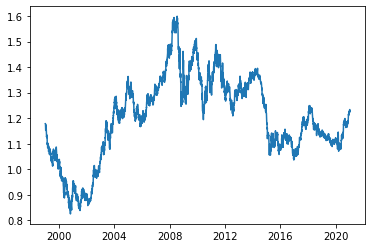

In [33]:
plt.plot(eur_usd['time'], eur_usd['USD'])
plt.show()

We do not want to show that daily variation on our graph. We want to hide it and show only the long-term trends by using the rolling mean (also known as the moving average). We will calculate the mean for each day using the `pandas.Series.rolling().mean()` method — the only exception is the first day, which doesn't have a previous day.

<ipython-input-34-a7cc5c51a617>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eur_usd['rolling_mean'] = eur_usd['USD'].rolling(30).mean()


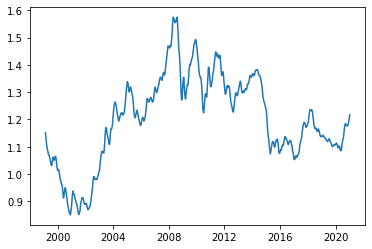

In [34]:
eur_usd['rolling_mean'] = eur_usd['USD'].rolling(30).mean()
plt.plot(eur_usd['time'], eur_usd['rolling_mean'])
plt.show()

## 2.4 Coming Up With an Idea

At this point we're going to spend some time coming up with an idea for the graph we want to build. Our goal is to create a storytelling data visualization using the data we have.

To create a story we need to arrange our data into a series of events that show change. Here are a few possibilities for our data:

- We show how the euro-dollar rate has changed during the coronavirus pandemic. We can show the 2020 data and the 2016-2019 data as a baseline. We can use a line plot.
- We show how the euro-dollar rate changed during the 2007-2008 financial crisis. We can also show the data for 2006 and 2009 for comparison. We can use a line plot.
- We show comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)). We can use a line plot.

First, we need to choose the right graph type. The graph should give our story the visual form it needs — we don't want to choose a histogram to visually represent a time series.

Equally important, we need to choose something that our audience will be familiar with. To simplify your work, you can choose any audience you want for your graph.

After that it is best to sketch the graph before writing the code. In sketching the graph, it's important to use some of the principles we've learned so far:

- Maximize the data-ink ratio.
- Create visual patterns using Gestalt principles.
- Guide the audience's attention using pre-attentive attributes.

These design principles can help you in two ways:

- They generate design options.
- They help you choose among those options.

In [38]:
import matplotlib.style as style

## Financial Crisis Example¶

In [43]:
financial_crisis = eur_usd.copy(
                   )[(eur_usd['time'].dt.year >= 2006
                   ) & (eur_usd['time'].dt.year <= 2009)]

In [45]:
financial_crisis_7_8 = eur_usd.copy(
                   )[(eur_usd['time'].dt.year >= 2007
                   ) & (eur_usd['time'].dt.year <= 2008)]

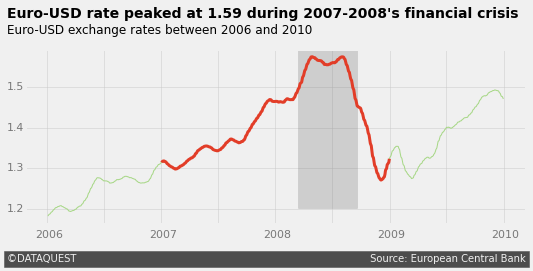

In [46]:
### Adding the FiveThirtyEight style
style.use('fivethirtyeight')

### Adding the plot
fig,ax = plt.subplots(figsize=(8,3))
ax.plot(financial_crisis['time'],
        financial_crisis['rolling_mean'],
        linewidth=1, color='#A6D785')

### Highlighting the 2007-2008 period
ax.plot(financial_crisis_7_8['time'],
        financial_crisis_7_8['rolling_mean'],
        linewidth=3, color='#e23d28')

### Highlihting the peak of the crisis
ax.axvspan(xmin=13950, xmax=14140, ymin=0.09,
           alpha=0.3, color='grey')

### Adding separate tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])

x = 13110
for year in ['2006', '2007', '2008', '2009', '2010']:
    ax.text(x, 1.13, year, alpha=0.5, fontsize=11)
    x += 365

y = 1.193   
for rate in ['1.2', '1.3', '1.4', '1.5']:
    ax.text(13020, y, rate, alpha=0.5, fontsize=11)
    y += 0.1

### Adding a title and a subtitle    
ax.text(13020, 1.67, "Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis",
        weight='bold')
ax.text(13020, 1.63, 'Euro-USD exchange rates between 2006 and 2010',
        size=12)

### Adding a signature
ax.text(13020, 1.07, '©DATAQUEST' + ' '*94 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=10)

### Add some transparency to the grid
ax.grid(alpha=0.5)

plt.show()

## The Three US Presidencies Example

Below we will use matplotlib's functional approach to build the graph because it offers more flexibility in arranging the subplots:
- We first build three of the graphs on a 2-by-3 grid (this grid should have six subplots, but we only build three; the bottom row remains empty).
- We then build only the bottom graph of a 2-by-1 grid (this grid should have two subplots; the top row remains empty).
- The two grids are merged, and we end up with three graphs on the top row and one graph on the bottom row.

In [36]:
bush_obama_trump = eur_usd.copy(
                   )[(eur_usd['time'].dt.year >= 2001) & (eur_usd['time'].dt.year < 2021)]
bush = bush_obama_trump.copy(
       )[bush_obama_trump['time'].dt.year < 2009]
obama = bush_obama_trump.copy(
       )[(bush_obama_trump['time'].dt.year >= 2009) & (bush_obama_trump['time'].dt.year < 2017)]
trump = bush_obama_trump.copy(
       )[(bush_obama_trump['time'].dt.year >= 2017) & (bush_obama_trump['time'].dt.year < 2021)]

<ipython-input-40-a61796efb478>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '',
<ipython-input-40-a61796efb478>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '',
<ipython-input-40-a61796efb478>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(['2017', '', '2018', '', '2019', '',


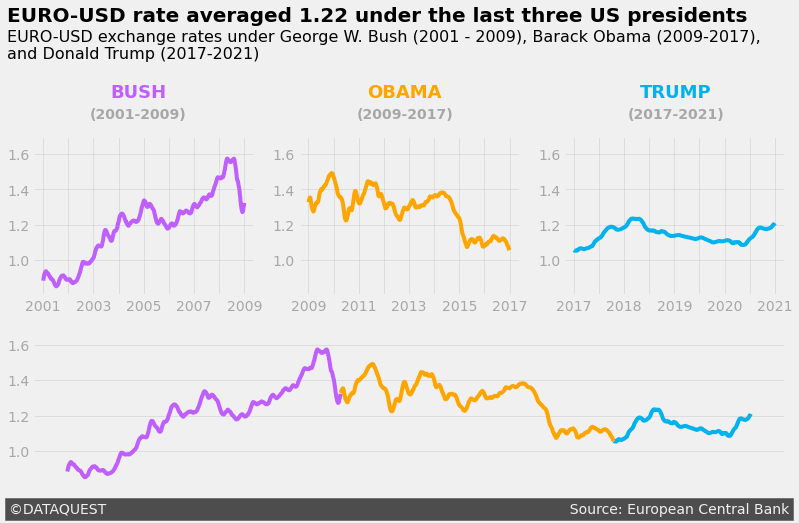

In [40]:
### Adding the FiveThirtyEight style
style.use('fivethirtyeight')

### Adding the subplots
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3, ax4]

### Changes to all the subplots
for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2','1.4', '1.6'],
                   alpha=0.3)
    ax.grid(alpha=0.5)    
    

### Ax1: Bush
ax1.plot(bush['time'], bush['rolling_mean'],
        color='#BF5FFF')
ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '',
                     '2007', '', '2009'],
                   alpha=0.3)
ax1.text(12300, 1.92, 'BUSH', fontsize=18, weight='bold',
        color='#BF5FFF')
ax1.text(12000, 1.8, '(2001-2009)', weight='bold',
        alpha=0.3)


### Ax2: Obama
ax2.plot(obama['time'], obama['rolling_mean'],
        color='#ffa500')
ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '',
                     '2015', '', '2017'],
                   alpha=0.3)
ax2.text(15100, 1.92, 'OBAMA', fontsize=18, weight='bold',
        color='#ffa500')
ax2.text(14950, 1.8, '(2009-2017)', weight='bold',
         alpha=0.3)


### Ax3: Trump
ax3.plot(trump['time'], trump['rolling_mean'],
        color='#00B2EE')
ax3.set_xticklabels(['2017', '', '2018', '', '2019', '',
                     '2020', '', '2021'],
                   alpha=0.3)
ax3.text(17650, 1.92, 'TRUMP', fontsize=18, weight='bold',
        color='#00B2EE')
ax3.text(17560, 1.8, '(2017-2021)', weight='bold',
         alpha=0.3)

### Ax4: Bush-Obama-Trump
ax4.plot(bush['time'], bush['rolling_mean'],
        color='#BF5FFF')
ax4.plot(obama['time'], obama['rolling_mean'],
        color='#ffa500')
ax4.plot(trump['time'], trump['rolling_mean'],
        color='#00B2EE')
ax4.grid(alpha=0.5)
ax4.set_xticks([])

### Adding a title and a subtitle
ax1.text(10800, 2.35, 'EURO-USD rate averaged 1.22 under the last three US presidents',
         fontsize=20, weight='bold')
ax1.text(10800, 2.14, '''EURO-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009-2017),
and Donald Trump (2017-2021)''',
        fontsize=16)

### Adding a signature
ax4.text(10700, 0.65, '©DATAQUEST' + ' '*103 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=14)

plt.show()